# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [6]:

sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')

sinasc_raw.munResLat = sinasc_raw.munResLat.abs()

sinasc_raw.head()



,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,11.93554,-61.99982,338.0,7067.025


# Tarefa 2

#### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [7]:

sinasc_0 = sinasc_raw[['munResNome','munResLat','TPFUNCRESP','TPDOCRESP']].copy()

faixa_munResLat = sinasc_0[['TPFUNCRESP','TPDOCRESP']].groupby(pd.cut(sinasc_0['munResLat'],[0,10.5,14]))

faixa_munResLat.agg(
    [('Soma','sum'), 
     ('Média','mean'),
     ('Mínimo','min'),
     ('Máximo','max'),
     ('Mediana','median'),
     ('Desvio Padrão','std'),
     ('Variancia','var'),
    ])



TPFUNCRESP                                                \
                   Soma     Média Mínimo Máximo Mediana Desvio Padrão   
munResLat                                                               
(0.0, 10.5]     32662.0  2.332334    1.0    5.0     2.0      1.078485   
(10.5, 14.0]    35878.0  2.769219    1.0    5.0     2.0      1.315289   

                       TPDOCRESP                                  \
             Variancia      Soma     Média Mínimo Máximo Mediana   
munResLat                                                          
(0.0, 10.5]   1.163131   44866.0  3.197862    0.0    5.0     3.0   
(10.5, 14.0]  1.729986   35981.0  2.771393    0.0    5.0     3.0   

                                      
             Desvio Padrão Variancia  
munResLat                             
(0.0, 10.5]       0.976695  0.953934  
(10.5, 14.0]      1.317478  1.735749

#### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [8]:

sinasc_1 = sinasc_raw[['munResNome','munResArea','QTDPARTCES','CONSPRENAT']].copy()

faixa_munResArea = sinasc_1[['QTDPARTCES','CONSPRENAT']].groupby(pd.cut(sinasc_1['munResArea'],[0,3000,35000]))

faixa_munResArea.agg(
    [('Soma','sum'), 
     ('Média','mean'),
     ('Mínimo','min'),
     ('Máximo','max'),
     ('Mediana','median'),
     ('Desvio Padrão','std'),
     ('Variancia','var'),
    ])


QTDPARTCES                                                \
                    Soma     Média Mínimo Máximo Mediana Desvio Padrão   
munResArea                                                               
(0, 3000]         2952.0  0.572981    0.0    5.0     0.0      0.749368   
(3000, 35000]    10184.0  0.507070    0.0   12.0     0.0      0.744981   

                        CONSPRENAT                                  \
              Variancia       Soma     Média Mínimo Máximo Mediana   
munResArea                                                           
(0, 3000]      0.561553    44775.0  8.709395    0.0   99.0     8.0   
(3000, 35000]  0.554997   170662.0  8.143825    0.0   99.0     8.0   

                                        
              Desvio Padrão  Variancia  
munResArea                              
(0, 3000]          4.290017  18.404248  
(3000, 35000]      5.325530  28.361275

#### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [9]:

sinasc_1 = sinasc_raw[['munResAlt','MESPRENAT','CONSPRENAT']].copy()

faixa_munResArea = sinasc_1[['MESPRENAT','CONSPRENAT']].groupby(pd.cut(sinasc_1['munResAlt'],3))

faixa_munResArea.agg(
    [('Soma','sum'), 
     ('Média','mean'),
     ('Mínimo','min'),
     ('Máximo','max'),
     ('Mediana','median'),
     ('Desvio Padrão','std'),
     ('Variancia','var'),
    ])


MESPRENAT                                                \
                    Soma     Média Mínimo Máximo Mediana Desvio Padrão   
munResAlt                                                                
(84.49, 255.0]  183517.0  8.985800    1.0   99.0     2.0     24.262855   
(255.0, 425.0]    7007.0  3.226059    1.0   99.0     2.0      8.339746   
(425.0, 595.0]    5891.0  3.761814    1.0   99.0     2.0      9.760131   

                           CONSPRENAT                                  \
                 Variancia       Soma     Média Mínimo Máximo Mediana   
munResAlt                                                               
(84.49, 255.0]  588.686117   181933.0  8.159162    0.0   99.0     8.0   
(255.0, 425.0]   69.551361    18215.0  8.204955    0.0   19.0     8.0   
(425.0, 595.0]   95.260164    15289.0  9.682711    0.0   99.0     9.0   

                                         
               Desvio Padrão  Variancia  
munResAlt                                
(84.49, 255.0]      5.208864  27.132266  
(255.0, 425.0]      2.608592   6.804752  
(425.0, 595.0]      6.502999  42.288997

#### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [10]:

regiao_imediata = {"Candeias do Jamari":"Porto Velho",
                   "Guajará-Mirim":"Porto Velho",
                   "Itapuã do Oeste":"Porto Velho",
                   "Nova Mamoré":"Porto Velho",
                   "Porto Velho":"Porto Velho",
                   "Alto Paraíso":"Ariquemes",
                   "Ariquemes":"Ariquemes",
                   "Buritis":"Ariquemes",
                   "Cacaulândia":"Ariquemes",
                   "Campo Novo de Rondônia":"Ariquemes",
                   "Cujubim":"Ariquemes",
                   "Monte Negro":"Ariquemes",
                   "Rio Crespo":"Ariquemes",
                   "Governador Jorge Teixeira":"Jaru",
                   "Jaru":"Jaru",
                   "Machadinho d'Oeste":"Jaru",
                   "Theobroma":"Jaru",
                   "Vale do Anari":"Jaru",
                   "Alvorada d'Oeste":"Ji-Paraná",
                   "Costa Marques":"Ji-Paraná",
                   "Ji-Paraná":"Ji-Paraná",
                   "Mirante da Serra":"Ji-Paraná",
                   "Nova União":"Ji-Paraná",
                   "Ouro Preto do Oeste":"Ji-Paraná",
                   "Presidente Médici":"Ji-Paraná",
                   "São Francisco do Guaporé":"Ji-Paraná",
                   "São Miguel do Guaporé":"Ji-Paraná",
                   "Seringueiras":"Ji-Paraná",
                   "Teixeirópolis":"Ji-Paraná",
                   "Urupá":"Ji-Paraná",
                   "Vale do Paraíso":"Ji-Paraná",
                   "Alta Floresta d'Oeste":"Cacoal",
                   "Alto Alegre dos Parecis":"Cacoal",
                   "Cacoal":"Cacoal",
                   "Castanheiras":"Cacoal",
                   "Espigão d'Oeste":"Cacoal",
                   "Ministro Andreazza":"Cacoal",
                   "Nova Brasilândia d'Oeste":"Cacoal",
                   "Novo Horizonte do Oeste":"Cacoal",
                   "Parecis":"Cacoal",
                   "Pimenta Bueno":"Cacoal",
                   "Primavera de Rondônia":"Cacoal",
                   "Rolim de Moura":"Cacoal",
                   "Santa Luzia d'Oeste":"Cacoal",
                   "São Felipe d'Oeste":"Cacoal",
                   "Cabixi":"Vilhena",
                   "Cerejeiras":"Vilhena",
                   "Chupinguaia":"Vilhena",
                   "Colorado do Oeste":"Vilhena",
                   "Corumbiara":"Vilhena",
                   "Pimenteiras do Oeste":"Vilhena",
                   "Vilhena":"Vilhena",
                  }


In [11]:

sinasc_2 = sinasc_raw[['IDADEMAE', 'munResNome','DTNASC']]

sinasc_2.set_index('munResNome').groupby(regiao_imediata).mean().round(2)


,IDADEMAE
Ariquemes,25.46
Cacoal,26.43
Jaru,25.81
Ji-Paraná,26.11
Porto Velho,26.17
Vilhena,26.42


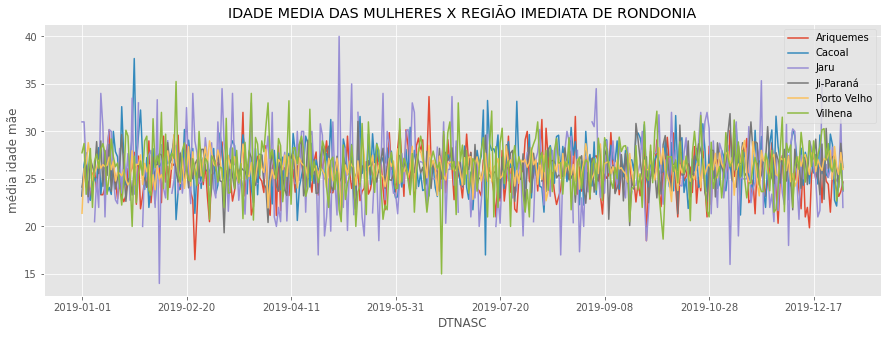

In [15]:

plt.style.use('ggplot')

sinasc_2.set_index('munResNome').groupby(['DTNASC',regiao_imediata])['IDADEMAE'].mean().unstack().plot(figsize=[15,5])

plt.title('IDADE MEDIA DAS MULHERES X REGIÃO IMEDIATA DE RONDONIA');

plt.ylabel('média idade mãe');


#### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


#### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [9]:

df_idh = pd.DataFrame()
df_idh["municipio"] = ["Porto Velho",
                       "Vilhena",
                       "Cacoal",
                       "Ji-Paraná",
                       "Pimenta Bueno",
                       "Ariquemes",
                       "Rolim de Moura",
                       "Cerejeiras",
                       "Jaru",
                       "Colorado do Oeste",
                       "Ouro Preto do Oeste",
                       "Espigão d'Oeste",
                       "Santa Luzia d'Oeste",
                       "Pimenteiras do Oeste",
                       "Presidente Médici",
                       "Castanheiras",
                       "Guajará-Mirim",
                       "Chupinguaia",
                       "Cabixi",
                       "Candeias do Jamari",
                       "São Felipe d'Oeste",
                       "Cacaulândia",
                       "São Miguel do Guaporé",
                       "Mirante da Serra",
                       "Alvorada d'Oeste",
                       "Teixeirópolis",
                       "Nova Brasilândia d'Oeste",
                       "Rio Crespo",
                       "Primavera de Rondônia",
                       "Alta Floresta d'Oeste",
                       "Ministro Andreazza",
                       "Novo Horizonte do Oeste",
                       "Vale do Paraíso",
                       "Alto Paraíso",
                       "Parecis",
                       "Buritis",
                       "Itapuã do Oeste",
                       "Corumbiara",
                       "Cujubim",
                       "Costa Marques",
                       "São Francisco do Guaporé",
                       "Urupá",
                       "Monte Negro",
                       "Seringueiras",
                       "Governador Jorge Teixeira",
                       "Machadinho d'Oeste",
                       "Campo Novo de Rondônia",
                       "Alto Alegre dos Parecis",
                       "Theobroma",
                       "Nova União",
                       "Nova Mamoré",
                       "Vale do Anari",
                      ]

# Usando outros intervalos como exemplo: (na base temos apenas os seguintes intervaslos('entre 0,800 - 1,000', 

## 'entre 0,600 - 0,699' e '0,500 a 0,599' ) )

# Intervalos Usados como exemplo: 'entre 0,700 - 0,799' e 'entre 0,000 - 0,499'

# Intervalos reais: 'entre 0,800 - 1,000', 'entre 0,600 - 0,699' e '0,500 a 0,599'

df_idh['idh'] = ["0,800 a 1,000",
                 "0,800 a 1,000",
                 "0,800 a 1,000",
                 "0,800 a 1,000",
                 "0,800 a 1,000",
                 "0,800 a 1,000",
                 "0,800 a 1,000",
                 "0,700 a 0,799",
                 "0,600 a 0,699",
                 "0,700 a 0,799",
                 "0,600 a 0,699",
                 "0,700 a 0,799",
                 "0,600 a 0,699",
                 "0,600 a 0,699",
                 "0,600 a 0,699",
                 "0,700 a 0,799",
                 "0,600 a 0,699",
                 "0,600 a 0,699",
                 "0,600 a 0,699",
                 "0,600 a 0,699",
                 "0,600 a 0,699",
                 "0,700 a 0,799",
                 "0,700 a 0,799",
                 "0,600 a 0,699",
                 "0,600 a 0,699",
                 "0,700 a 0,799",
                 "0,600 a 0,699",
                 "0,600 a 0,699",
                 "0,700 a 0,799",
                 "0,600 a 0,699",
                 "0,700 a 0,799",
                 "0,600 a 0,699",
                 "0,700 a 0,799",
                 "0,600 a 0,699",
                 "0,600 a 0,699",
                 "0,600 a 0,699",
                 "0,600 a 0,699",
                 "0,600 a 0,699",
                 "0,600 a 0,699",
                 "0,000 a 0,499",
                 "0,600 a 0,699",
                 "0,000 a 0,499",
                 "0,600 a 0,699",
                 "0,000 a 0,499",
                 "0,500 a 0,599",
                 "0,500 a 0,599",
                 "0,500 a 0,599",
                 "0,500 a 0,599",
                 "0,500 a 0,599",
                 "0,500 a 0,599",
                 "0,500 a 0,599",
                 "0,000 a 0,499",
                ]

df = df_idh[['municipio','idh']]

result = df.set_index('idh')

mapping = {
    "0,800 a 1,000": "0,800 a 1,000 -- IDH muito alto",
    "0,700 a 0,799":"0,700 a 0,799 -- IDH alto", 
    "0,600 a 0,699": "0,600 a 0,699 -- IDH médio", 
    "0,500 a 0,599":"0,500 a 0,599 -- IDH baixo",
    "0,000 a 0,499":"0,000 a 0,499 -- IDH muito baixo",
}


In [10]:

result.groupby(mapping).count()


,municipio
"0,000 a 0,499 -- IDH muito baixo",4
"0,500 a 0,599 -- IDH baixo",7
"0,600 a 0,699 -- IDH médio",24
"0,700 a 0,799 -- IDH alto",10
"0,800 a 1,000 -- IDH muito alto",7


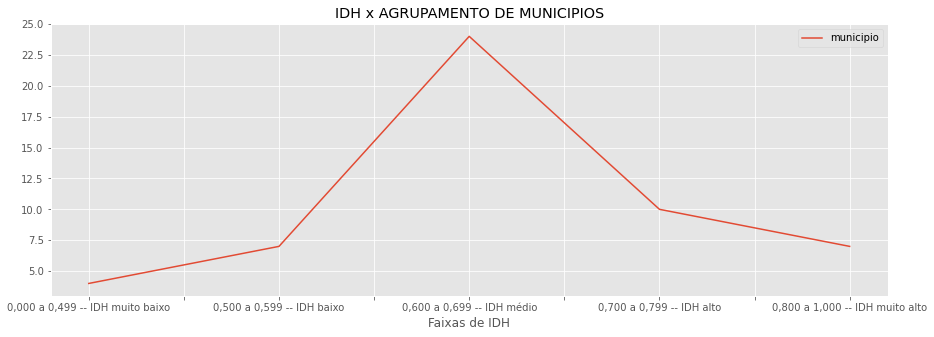

In [11]:
plt.style.use('ggplot')

result.groupby(mapping).count().plot(figsize=[15,5])

plt.xlabel('Faixas de IDH')

plt.title('IDH x AGRUPAMENTO DE MUNICIPIOS');


In [14]:
# Municipios com idh no intervalo --> 0,600 a 0,699

idh_medio_municipio = df_idh[df_idh['idh'] == '0,600 a 0,699']

#idh_medio_municipio


In [15]:
# Municipios com idh no intervalo --> 0,800 a 1,000

idh_muito_alto_municipio = df_idh[df_idh['idh'] == '0,800 a 1,000']

#idh_muito_alto_municipio


In [16]:
# Municipios com idh no intervalo --> 0,700 a 0,799

idh_alto_municipio = df_idh[df_idh['idh'] == '0,700 a 0,799']

#idh_alto_municipio


In [17]:
# Municipios com idh no intervalo --> 0,500 a 0,599

idh_baixo_municipio = df_idh[df_idh['idh'] == '0,500 a 0,599']

#idh_baixo_municipio


In [18]:
# Municipios com idh no intervalo --> 0,000 a 0,499

idh_muito_baixo_municipio = df_idh[df_idh['idh'] == '0,000 a 0,499']

#idh_muito_baixo_municipio


#### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [19]:

df_ifdm = pd.DataFrame()
df_ifdm["municipio"] = ["Ariquemes",
                       "Vilhena",
                       "Pimenta Bueno",
                       "Porto Velho",
                       "Ji-Paraná",
                       "Cacoal",
                       "Santa Luzia d'Oeste",
                       "Rolim de Moura",
                       "Chupinguaia",
                       "São Miguel do Guaporé",
                       "Pimenteiras do Oeste",
                       "Teixeirópolis",
                       "Colorado do Oeste",
                       "Jaru",
                       "Rio Crespo",
                       "Primavera de Rondônia",
                       "Alta Floresta d'Oeste",
                       "Ouro Preto do Oeste",
                       "São Francisco do Guaporé",
                       "Candeias do Jamari",
                       "Buritis",
                       "São Felipe d'Oeste",
                       "Presidente Médici",
                       "Cerejeiras",
                       "Monte Negro",
                       "Urupá",
                       "Espigão d'Oeste",
                       "Seringueiras",
                       "Alvorada d'Oeste",
                       "Itapuã do Oeste",
                       "Cabixi",
                       "Novo Horizonte do Oeste",
                       "Nova Brasilândia d'Oeste",
                       "Vale do Paraíso",
                       "Corumbiara",
                       "Alto Paraíso",
                       "Cacaulândia",
                       "Vale do Anari",
                       "Ministro Andreazza",
                       "Costa Marques",
                       "Nova União",
                       "Guajará-Mirim",
                       "Mirante da Serra",
                       "Parecis",
                       "Castanheiras",
                       "Theobroma",
                       "Machadinho d'Oeste",
                       "Campo Novo de Rondônia",
                       "Nova Mamoré",
                       "Cujubim",
                       "Alto Alegre dos Parecisa",
                       "Governador Jorge Teixeira",
                      ]

# Usando outros intervalos como exemplo: (na base temos apenas os seguintes intervaslos('entre 0,6 - 0,8' e 'entre 0,4 - 0,6' ) )

# Intervalos Usados como exemplo: 'superiores a 0,8 pontos' e 'inferiores a 0,4 pontos'

# Intervalos reais: 'entre 0,6 - 0,8' e 'entre 0,4 - 0,6'

df_ifdm['ifdm'] = ["entre 0,6 e 0,8 pontos",
                 "entre 0,6 e 0,8 pontos",
                 "superiores a 0,8 pontos",
                 "entre 0,6 e 0,8 pontos",
                 "superiores a 0,8 pontos",
                 "superiores a 0,8 pontos",
                 "superiores a 0,8 pontos",
                 "entre 0,6 e 0,8 pontos",
                 "superiores a 0,8 pontos",
                 "entre 0,6 e 0,8 pontos",
                 "superiores a 0,8 pontos",
                 "entre 0,6 e 0,8 pontos",
                 "entre 0,6 e 0,8 pontos",
                 "superiores a 0,8 pontos",
                 "entre 0,6 e 0,8 pontos",
                 "entre 0,6 e 0,8 pontos",
                 "entre 0,6 e 0,8 pontos",
                 "entre 0,6 e 0,8 pontos",
                 "entre 0,6 e 0,8 pontos",
                 "entre 0,6 e 0,8 pontos",
                 "entre 0,6 e 0,8 pontos",
                 "entre 0,6 e 0,8 pontos",
                 "entre 0,6 e 0,8 pontos",
                 "entre 0,6 e 0,8 pontos",
                 "entre 0,6 e 0,8 pontos",
                 "entre 0,6 e 0,8 pontos",
                 "entre 0,4 e 0,6 pontos",
                 "entre 0,4 e 0,6 pontos",
                 "entre 0,4 e 0,6 pontos",
                 "entre 0,4 e 0,6 pontos",
                 "entre 0,4 e 0,6 pontos",
                 "entre 0,4 e 0,6 pontos",
                 "entre 0,4 e 0,6 pontos",
                 "entre 0,4 e 0,6 pontos",
                 "entre 0,4 e 0,6 pontos",
                 "entre 0,4 e 0,6 pontos",
                 "entre 0,4 e 0,6 pontos",
                 "entre 0,4 e 0,6 pontos",
                 "entre 0,4 e 0,6 pontos",
                 "entre 0,4 e 0,6 pontos",
                 "entre 0,4 e 0,6 pontos",
                 "inferiores a 0,4 pontos",
                 "entre 0,4 e 0,6 pontos",
                 "entre 0,4 e 0,6 pontos",
                 "inferiores a 0,4 pontos",
                 "entre 0,4 e 0,6 pontos",
                 "inferiores a 0,4 pontos",
                 "entre 0,4 e 0,6 pontos",
                 "inferiores a 0,4 pontos",
                 "inferiores a 0,4 pontos",
                 "entre 0,4 e 0,6 pontos",
                 "inferiores a 0,4 pontos",
                ]

df_1 = df_ifdm[['municipio','ifdm']]

result = df_1.set_index('ifdm')

mapping = {
    "superiores a 0,8 pontos": "superiores a 0,8 pontos -- IFDM Alto",
    "entre 0,6 e 0,8 pontos":"entre 0,6 e 0,8 pontos -- IFDM Moderado", 
    "entre 0,4 e 0,6 pontos": "entre 0,4 e 0,6 pontos -- IFDM Regular", 
    "inferiores a 0,4 pontos":"inferiores a 0,4 pontos -- IFDM Baixo",
}


In [20]:

result.groupby(mapping).count()


,municipio
"entre 0,4 e 0,6 pontos -- IFDM Regular",20
"entre 0,6 e 0,8 pontos -- IFDM Moderado",19
"inferiores a 0,4 pontos -- IFDM Baixo",6
"superiores a 0,8 pontos -- IFDM Alto",7


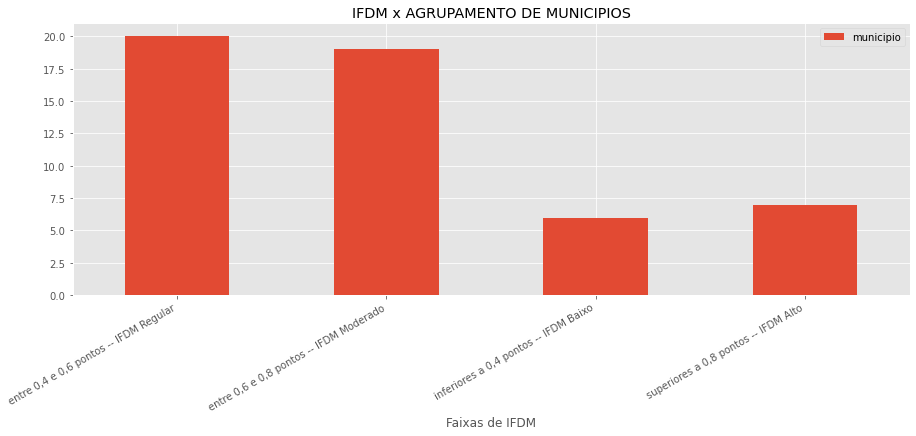

In [21]:

result.groupby(mapping).count().plot.bar(figsize=[15,5])

plt.xticks(rotation = 30, ha='right')

plt.xlabel('Faixas de IFDM')

plt.title('IFDM x AGRUPAMENTO DE MUNICIPIOS');


In [22]:
# Municipios com ifdm no intervalo --> inferiores a 0,4 pontos

ifdm_baixo_municipio = df_ifdm[df_ifdm['ifdm'] == 'inferiores a 0,4 pontos']

#ifdm_baixo_municipio


In [23]:
# Municipios com ifdm no intervalo --> entre 0,4 e 0,6 pontos

ifdm_regular_municipio = df_ifdm[df_ifdm['ifdm'] == 'entre 0,4 e 0,6 pontos']

#ifdm_regular_municipio


In [24]:

ifdm_moderado_municipio = df_ifdm[df_ifdm['ifdm'] == 'entre 0,6 e 0,8 pontos']

#ifdm_moderado_municipio


In [25]:
# Municipios com ifdm no intervalo --> superiores a 0,8 pontos

ifdm_alto_municipio = df_ifdm[df_ifdm['ifdm'] == 'superiores a 0,8 pontos']

ifdm_alto_municipio


,municipio,ifdm
2,Pimenta Bueno,"superiores a 0,8 pontos"
4,Ji-Paraná,"superiores a 0,8 pontos"
5,Cacoal,"superiores a 0,8 pontos"
6,Santa Luzia d'Oeste,"superiores a 0,8 pontos"
8,Chupinguaia,"superiores a 0,8 pontos"
10,Pimenteiras do Oeste,"superiores a 0,8 pontos"
13,Jaru,"superiores a 0,8 pontos"


#### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [26]:

df_pib = pd.DataFrame()
df_pib["municipio"] = ["Porto Velho",
                       "Ji-Paraná",
                       "Vilhena",
                       "Ariquemes",
                       "Cacoal",
                       "Jaru",
                       "Rolim de Moura",
                       "Pimenta Bueno",
                       "Guajará-Mirim",
                       "Ouro Preto do Oeste",
                       "Buritis",
                       "Machadinho do Oeste",
                       "Espigão d'Oeste",
                       "São Miguel do Guaporé",
                       "Candeias do Jamari",
                       "Nova Mamoré",
                       "ACerejeiras",
                       "Alta Floresta do Oeste",
                       "Presidente Médici",
                       "Cujubim",
                       "Nova Brasilândia do Oeste",
                       "Alto Paraíso",
                       "São Francisco do Guaporé",
                       "Colorado do Oeste",
                       "Monte Negro",
                       "Alto Alegre dos Parecis",
                       "ECampo Novo de Rondônia",
                       "Alvorada do Oeste",
                       "Chupinguaia",
                       "Corumbiara",
                       "Ministro Andreazza",
                       "Urupá",
                       "Costa Marques",
                       "Seringueiras",
                       "Mirante da Serra",
                       "Governador Jorge Teixeira",
                       "Theobroma",
                       "Santa Luzia do Oeste",
                       "Novo Horizonte do Oeste",
                       "Itapuã do Oeste",
                       "Vale do Paraíso",
                       "Cacaulândia",
                       "Cabixi",
                       "Vale do Anari",
                       "Nova União",
                       "Parecis",
                       "Rio Crespo",
                       "Pimenteiras do Oeste",
                       "Teixeirópolis",
                       "São Felipe do Oeste",
                       "Castanheiras",
                       "Primavera de Rondônia",
                      ]

df_pib["pib"] = ["Acima de 1 Bilhão",
                 "Acima de 1 Bilhão",
                 "Acima de 1 Bilhão",
                 "Acima de 1 Bilhão",
                 "Acima de 1 Bilhão",
                 "Acima de 1 Bilhão",
                 "Acima de 1 Bilhão",
                 "Acima de 1 Bilhão",
                 "Acima de 500 Milhões",
                 "Acima de 500 Milhões",
                 "Acima de 500 Milhões",
                 "Acima de 500 Milhões",
                 "Acima de 500 Milhões",
                 "Acima de 500 Milhões",
                 "Acima de 500 Milhões",
                 "Acima de 500 Milhões",
                 "Acima de 500 Milhões",
                 "Acima de 300 Milhões",
                 "Acima de 300 Milhões",
                 "Acima de 300 Milhões",
                 "Acima de 300 Milhões",
                 "Acima de 300 Milhões",
                 "Acima de 300 Milhões",
                 "Acima de 300 Milhões",
                 "Acima de 200 Milhões",
                 "Acima de 200 Milhões",
                 "Acima de 200 Milhões",
                 "Acima de 200 Milhões",
                 "Acima de 100 Milhões",
                 "Acima de 100 Milhões",
                 "Acima de 100 Milhões",
                 "Acima de 100 Milhões",
                 "Acima de 100 Milhões",
                 "Acima de 100 Milhões",
                 "Acima de 100 Milhões",
                 "Acima de 100 Milhões",
                 "Acima de 100 Milhões",
                 "Acima de 100 Milhões",
                 "Acima de 100 Milhões",
                 "Acima de 100 Milhões",
                 "Acima de 100 Milhões",
                 "Acima de 100 Milhões",
                 "Acima de 100 Milhões",
                 "Acima de 100 Milhões",
                 "Até 100 Milhões",
                 "Até 100 Milhões",
                 "Até 100 Milhões",
                 "Até 100 Milhões",
                 "Até 100 Milhões",
                 "Até 100 Milhões",
                 "Até 100 Milhões",
                 "Até 100 Milhões",
                ]

df_2 = df_pib[['municipio','pib']]

result = df_2.set_index('pib')

mapping = {
    "Até 100 Milhões": "pib de 0 a 100 Milhões",
    "Acima de 100 Milhões":"pib de 100 a 200 Milhões", 
    "Acima de 200 Milhões":"pib de 200 a 300 Milhões", 
    "Acima de 300 Milhões":"pib de 300 a 500 Milhões",
    "Acima de 500 Milhões":"pib de 500 a 1 Bilhão",
    "Acima de 1 Bilhão":"pib > 1 Bilhão",
}


In [27]:

result.groupby(mapping).count()


,municipio
pib > 1 Bilhão,8
pib de 0 a 100 Milhões,8
pib de 100 a 200 Milhões,16
pib de 200 a 300 Milhões,4
pib de 300 a 500 Milhões,7
pib de 500 a 1 Bilhão,9


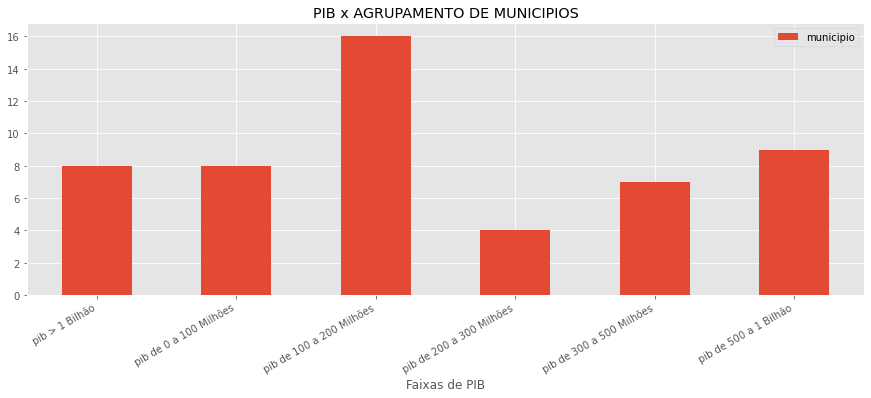

In [28]:

result.groupby(mapping).count().plot.bar(figsize=[15,5])

plt.xticks(rotation = 30, ha='right')

plt.xlabel('Faixas de PIB')

plt.title('PIB x AGRUPAMENTO DE MUNICIPIOS');


In [29]:
# Municipios com pib no intervalo --> Até 100 Milhões

pib_municipio_ate_100_milhoes = df_pib[df_pib['pib'] == 'Até 100 Milhões']

#pib_municipio_ate_100_milhoes


In [30]:
# Municipios com pib no intervalo --> Acima de 100 Milhões

pib_municipio_acima_100_milhoes = df_pib[df_pib['pib'] == 'Acima de 100 Milhões']

#pib_municipio_acima_100_milhoes


In [31]:
# Municipios com pib no intervalo --> Acima de 200 Milhões

pib_municipio_acima_200_milhoes = df_pib[df_pib['pib'] == 'Acima de 200 Milhões']

#pib_municipio_acima_200_milhoes


In [32]:
# Municipios com pib no intervalo --> Acima de 300 Milhões

pib_municipio_acima_300_milhoes = df_pib[df_pib['pib'] == 'Acima de 300 Milhões']

#pib_municipio_acima_300_milhoes


In [33]:
# Municipios com pib no intervalo --> Acima de 500 Milhões

pib_municipio_acima_500_milhoes = df_pib[df_pib['pib'] == 'Acima de 500 Milhões']

#pib_municipio_acima_500_milhoes


In [34]:
# Municipios com pib no intervalo --> Acima de 1 Bilhão

pib_municipio_acima_1_bilhao = df_pib[df_pib['pib'] == 'Acima de 1 Bilhão']

#pib_municipio_acima_1_bilhao


#### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

    --> A média das idades das mulheres gestantes por região imediata estão bem próximas, ficando entre: 25.4 e 26.4.
    
    --> O maior IDH dos municípios estão no intervalo de: 0,800 e 1,000 (7 municípios), sendo que nenhum município atingiu o IDH máximo.
    
    --> O IDH muito baixo, esta no intervalo de 0,000 a 0,499 <--> 4 municípios
    
    --> O IDH baixo, esta no intervalo de 0,500 a 0,599 <--> 7 municípios
    
    --> O IDH alto, esta no intervalo de 0,700 a 0,799 <--> 10 municípios
    
    --> O IDH médio, esta no intervalo de 0,600 a 0,699 <--> 24 municípios
    
    --> O maior IFDM dos municípios esta no intervalo superior a 0,8 pontos <--> 7 municípios
    
    --> IFDM entre 0,4 e 0,6 <--> 20 municípios 
    
    --> IFDM entre 0,6 e 0,8 <--> 19 municípios
    
    --> IFDM inferior a 0,4 <--> 6 municípios
    
    --> O maior PIB dos municípios esta no intervalo superior a 1 Bilhão <--> 8 municípios
    
    --> PIB entre 0 e 100 milhões <--> 8 municípios
    
    --> PIB entre 100 e 200 milhões <--> 16 municípios
    
    --> PIB entre 200 e 300 milhões <--> 4 municípios
    
    --> PIB entre 300 e 500 milhões <--> 7 municípios
    
    --> PIB entre 500 e 1 bilhão <--> 9 municípios
    
    Observação: Todos os municípios estão catalogados (IDH, IFDM, PIB) logo acima.
    